In [1]:
# !pip install seaborn
import seaborn as sns
import pandas as pd
from jobs_skills_weights import get_jobs, get_raw_job_details
import skill_weights
import matplotlib.pyplot as plt

In [2]:
jobs = get_jobs(bookmarked=False)
raw_job_details = get_raw_job_details(jobs)

In [3]:
job_skill_weights = skill_weights.get_job_skill_weights(raw_job_details, collapse_categories=False)[["share of job"]]

In [4]:
skill_shares = job_skill_weights.reset_index().groupby(["category", "skill"], dropna=False).sum("share of job").div(job_skill_weights.sum()).rename(columns={"share of job":"share of total"})

In [13]:
cat_shares = skill_shares.groupby(level="category", dropna=False).sum().sort_values("share of total")
cat_shares["cumean"] = cat_shares.expanding().mean()
cat_shares = cat_shares.sort_values("share of total", ascending=False)

In [33]:
split_limit = 0.008

In [44]:
explode = ((split_limit - cat_shares["cumean"]).clip(0, None)*50).pow(0.5)
explode

category
Ml                         0.000000
Personal Traits            0.000000
Data Engineering           0.000000
Data Infrastructure        0.000000
Admin Cloud                0.000000
Databases                  0.000000
Project                    0.000000
Software Planning          0.000000
Code Data                  0.000000
Academic                   0.000000
Team Skills                0.172484
Admin                      0.239762
Personality                0.295742
Software Development       0.343482
Communication              0.390233
Software Best Practices    0.427158
Python Tools               0.456897
Java                       0.486779
Data Visualization         0.496466
Unix                       0.502694
Efficiency                 0.509576
Webdev                     0.517100
Bio                        0.526497
Monitoring                 0.537752
Code Research              0.552468
AWS Tools                  0.572379
Remote Work                0.590328
Product            

<AxesSubplot: >

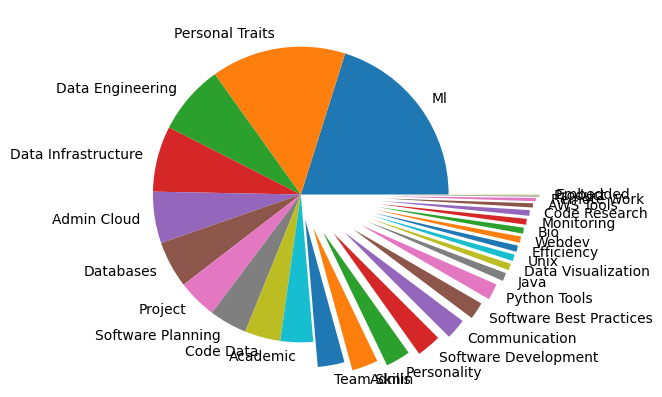

In [45]:
cat_shares.plot.pie(
    y="share of total",
    legend=False,
    ylabel="",
    explode=explode
)

In [17]:
skill_shares.groupby(level="skill").sum().sort_values("share of total", ascending=False).head(20)

,share of total
skill,
data,0.073346
experience,0.065452
machine learning,0.062892
deep learning,0.023960
software engineering,0.022530
containerization,0.019686
research,0.018406
python,0.017614
large scale,0.016675


In [10]:
skill_shares.xs(
    "Data Engineering",
    level='category',
    axis="index", 
).sort_values("share of total", ascending=False)

,share of total
skill,
data,0.024449
analysis,0.006865
large scale,0.005558
big data,0.005423
spark,0.003144


In [49]:
skill_shares.groupby(level="skill").sum().loc[
    "iteration"
].values

array([0.00024589])

In [31]:
skill_shares.sort_values("share of total", ascending=False).head(60)

,,share of total
category,skill,
Personal Traits,experience,0.065452
Ml,machine learning,0.062892
Data Engineering,data,0.024449
Databases,data,0.024449
Data Infrastructure,data,0.024449
Ml,deep learning,0.023960
Admin Cloud,containerization,0.019686
Academic,research,0.018406
Team Skills,collaboration,0.013318


In [12]:
assert false

NameError: name 'false' is not defined

In [ ]:
job_skills_data = skill_weights.get_job_skill_counts(raw_job_details)

In [ ]:
job_skills_shares = (job_skills_data / job_skills_data.sum()).rename(columns={"count":"share of total"})

In [ ]:
mjss = job_skills_shares.groupby(level="skill").sum().sort_values("share of total", ascending=False)
mjss = pd.concat([mjss, pd.DataFrame({"name":[None], "share of total":[0]}).set_index("name")])

mjss["( Share WHERE Share>Threshold ) Sum"] = mjss["share of total"].shift().fillna(0).cumsum()
# mjss["Share Below Threshold"] = mjss.loc[::-1, 'share of total'].cumsum()[::-1]

mjss["( Share WHERE Share>Threshold ) Mean"] = mjss["share of total"].expanding().mean()

In [ ]:
mjss

In [ ]:
fig, total_axis = plt.subplots()
fig.suptitle("Metrics WHERE Share>Threshold")
density_axis = total_axis.twinx()
mjss.plot(x="share of total", y="( Share WHERE Share>Threshold ) Sum", drawstyle="steps-pre", ax=total_axis, color="blue", legend=False, ylim=(0, 1))
mjss.plot(x="share of total", y="( Share WHERE Share>Threshold ) Mean", drawstyle="steps-post", ax=density_axis, color='orange', legend=False, ylim=(0, 0.1))

t_handles, t_labels = total_axis.get_legend_handles_labels()
d_handles, d_labels = density_axis.get_legend_handles_labels()

fig.legend(handles=[*d_handles, *t_handles], labels=[*d_labels, *t_labels], loc=(0.3,0.35))

density_axis.grid()
total_axis.set_ylabel("Sum")
density_axis.set_ylabel("Mean")
total_axis.set_xlabel("Threshold")

total_axis.spines['left'].set_color("blue")
total_axis.tick_params('y', colors="blue")
total_axis.yaxis.label.set_color("blue")

density_axis.spines['left'].set_visible(False)
density_axis.spines['right'].set_color("orange")
density_axis.tick_params('y', colors="orange")
density_axis.yaxis.label.set_color("orange")

In [ ]:
tradeoff_axis = mjss.plot(
    x="( Share WHERE Share>Threshold ) Sum", 
    y="( Share WHERE Share>Threshold ) Mean", 
    drawstyle='steps-post', 
    legend=False, 
    xlim=(-0.05,1.05), ylim=(-0.005, 0.105)
)

tradeoff_axis.grid()
tradeoff_axis.set_title("Share: Sum vs Mean Tradeoff")
tradeoff_axis.set_xlabel("Sum")
tradeoff_axis.set_ylabel("Mean")